In [15]:
import pandas as pd


df = pd.read_csv('realestate4.csv')

print(df.head())

print(df.describe())
print(df.isnull().sum())


   status  bed  bath  acre_lot  city  state  zip_code  house_size   price
0       0  1.0     1     20.20     1      0      1095        1751  299000
1       1  1.0     2      0.28     2      0      1030        1060  300000
2       0  4.0     2      0.16     3      0      1105        1402  199900
3       0  5.0     1      0.13     4      0      1040        1327  300000
4       0  3.0     1      0.13     5      0      1089        1715  299000
            status          bed         bath     acre_lot         city  \
count  7924.000000  7924.000000  7924.000000  7924.000000  7924.000000   
mean      0.355755     2.988495     1.499874     3.479480   146.956966   
std       0.478772     1.423020     0.500032    12.682722    58.239222   
min       0.000000     1.000000     1.000000     0.000000     1.000000   
25%       0.000000     2.000000     1.000000     0.220000   111.000000   
50%       0.000000     3.000000     1.000000     0.560000   162.000000   
75%       1.000000     4.000000     2.

In [16]:
# Handle missing data
df.dropna(inplace=True)

# Remove duplicates
df.drop_duplicates(inplace=True)


In [17]:
import matplotlib.pyplot as plt
import seaborn as sns



<Axes: xlabel='state', ylabel='price'>

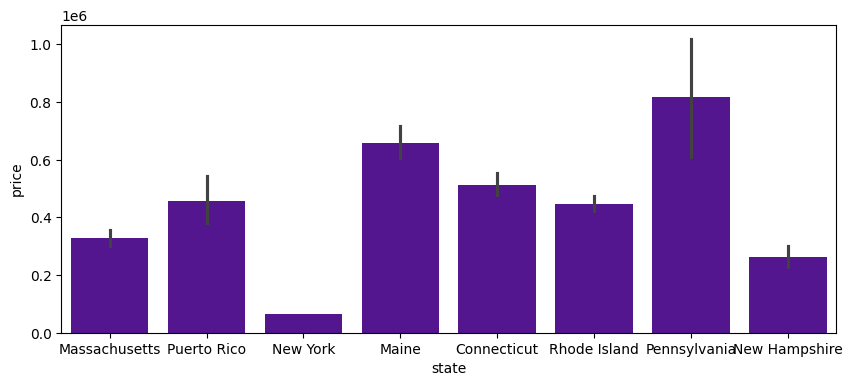

In [7]:
plt.figure(figsize = (10, 4), dpi = 100) 
color_palette = sns.color_palette("plasma") 
sns.set_palette(color_palette)
 
sns.barplot(x = "state", y = "price", data = df)

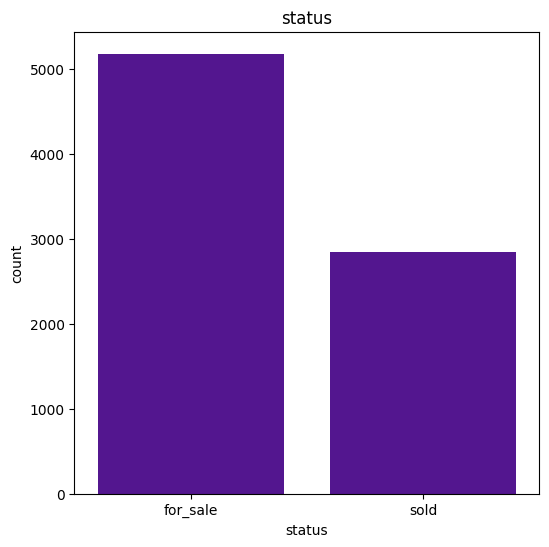

In [9]:
df.status.value_counts()
plt.figure(figsize=(6,6)) 
sns.countplot(x = "status", data = df)
plt.title('status') 
plt.show()

status
for_sale    5182
sold        5182
Name: count, dtype: int64


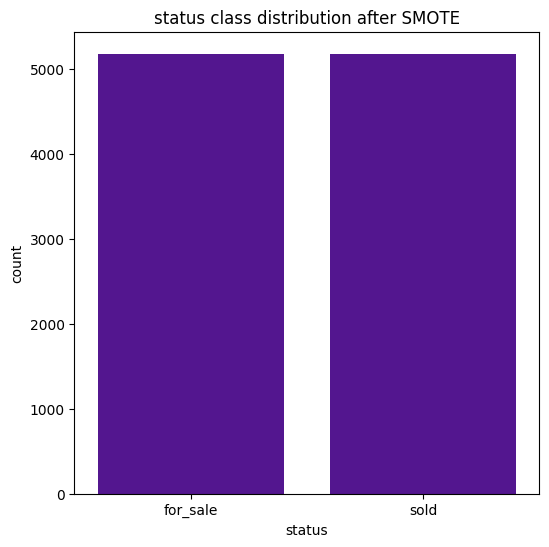

In [11]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling import SMOTE 
import matplotlib.pyplot as plt
import seaborn as sns

X = df.drop(columns=['status'])
y = df['status']
X_encoded = pd.get_dummies(X)

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_encoded, y)

print(pd.Series(y_resampled).value_counts())

plt.figure(figsize=(6,6))
sns.countplot(x=y_resampled)
plt.title('status class distribution after SMOTE')
plt.show()
